In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
%matplotlib inline
import scipy.stats as norm
import calmap
import seaborn as sns
import io
import requests
from pandas.plotting import scatter_matrix

In [4]:
df=pd.read_excel('Absenteeism_at_work.xls')

In [6]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                  239554  ...                     0          1    2   
1                  239554  ...                     1          1    1   
2                  239554  ...                     0          1    0   
3                  239554  ...                     0          1    2   
4                  239554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [7]:
df.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000           271490.235135  ...   
std        4.384873    6.478772            39058.116188  ...   
min        1.000000   27.000000           205917.000000  ...   
25%        9.000000   31.000000           244387.000000  ...   
50%       13.000000   37.000000           264249.000000  ...   
75%       16.000000   40.000000           294217.000000  ...   
max       29.000000   58.000000           378884.000000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [45]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [99]:
df=df.drop('ID',axis=1)
df.shape

(740, 20)

In [100]:
df.isnull().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


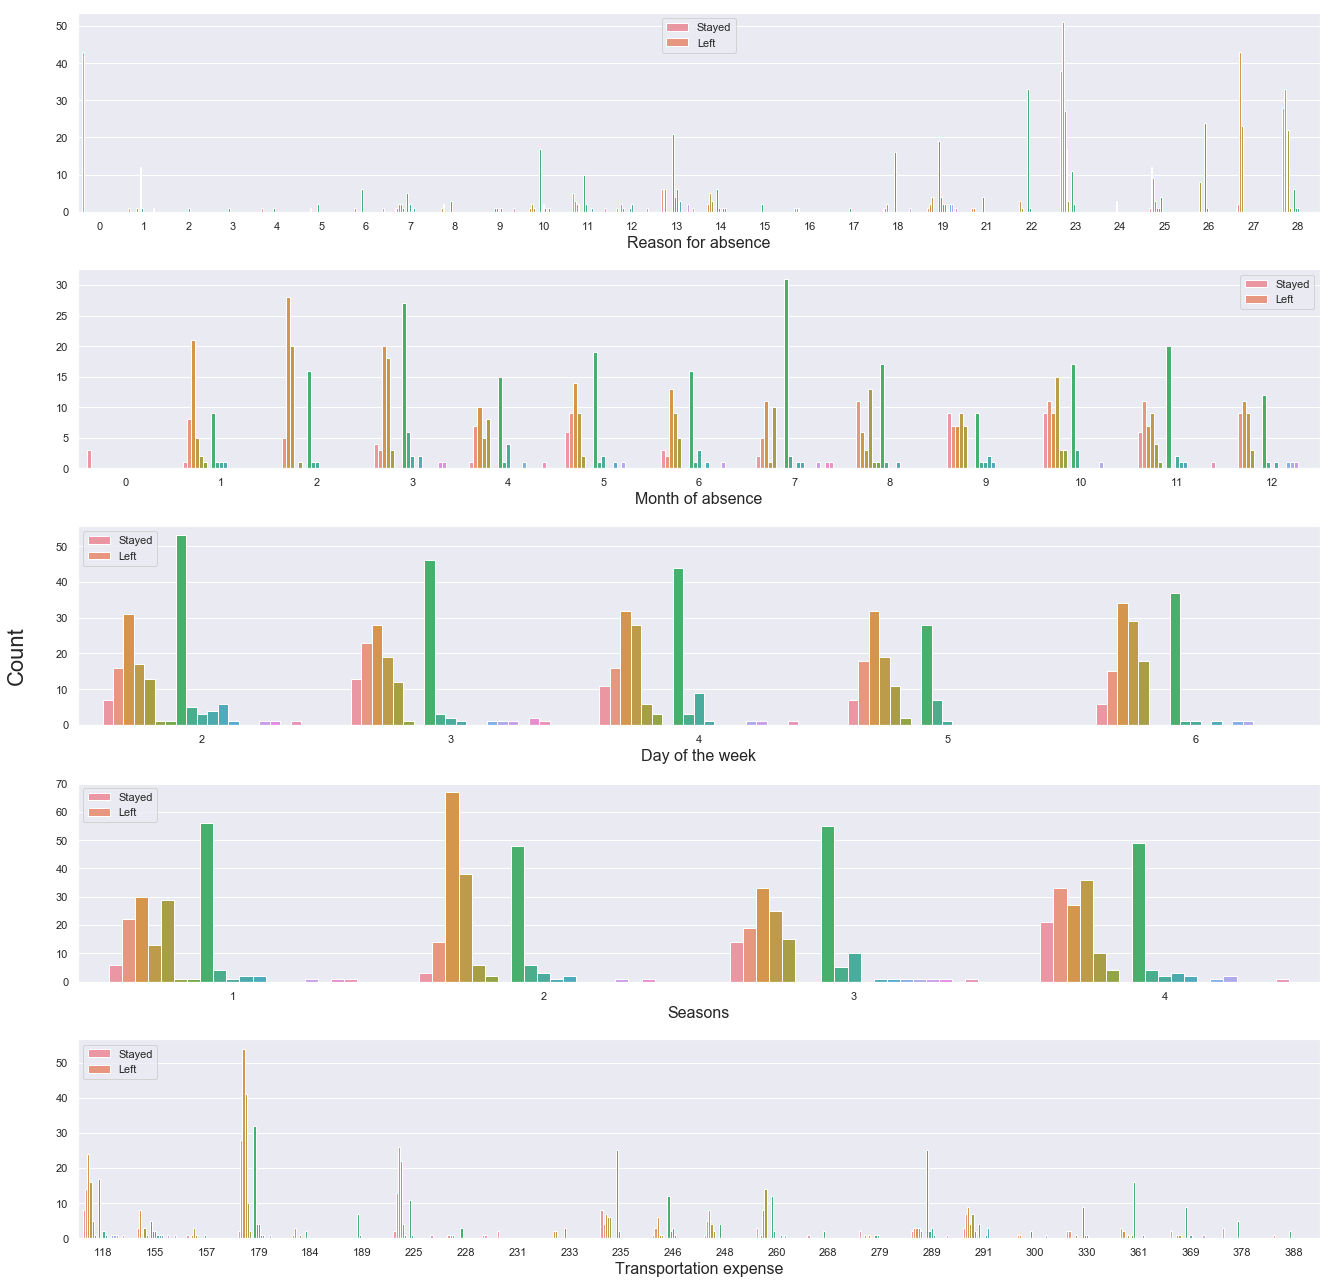

In [88]:
f, axes = plt.subplots(5,1, figsize=(18,18), tight_layout=True)
x_vars = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Absenteeism time in hours', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


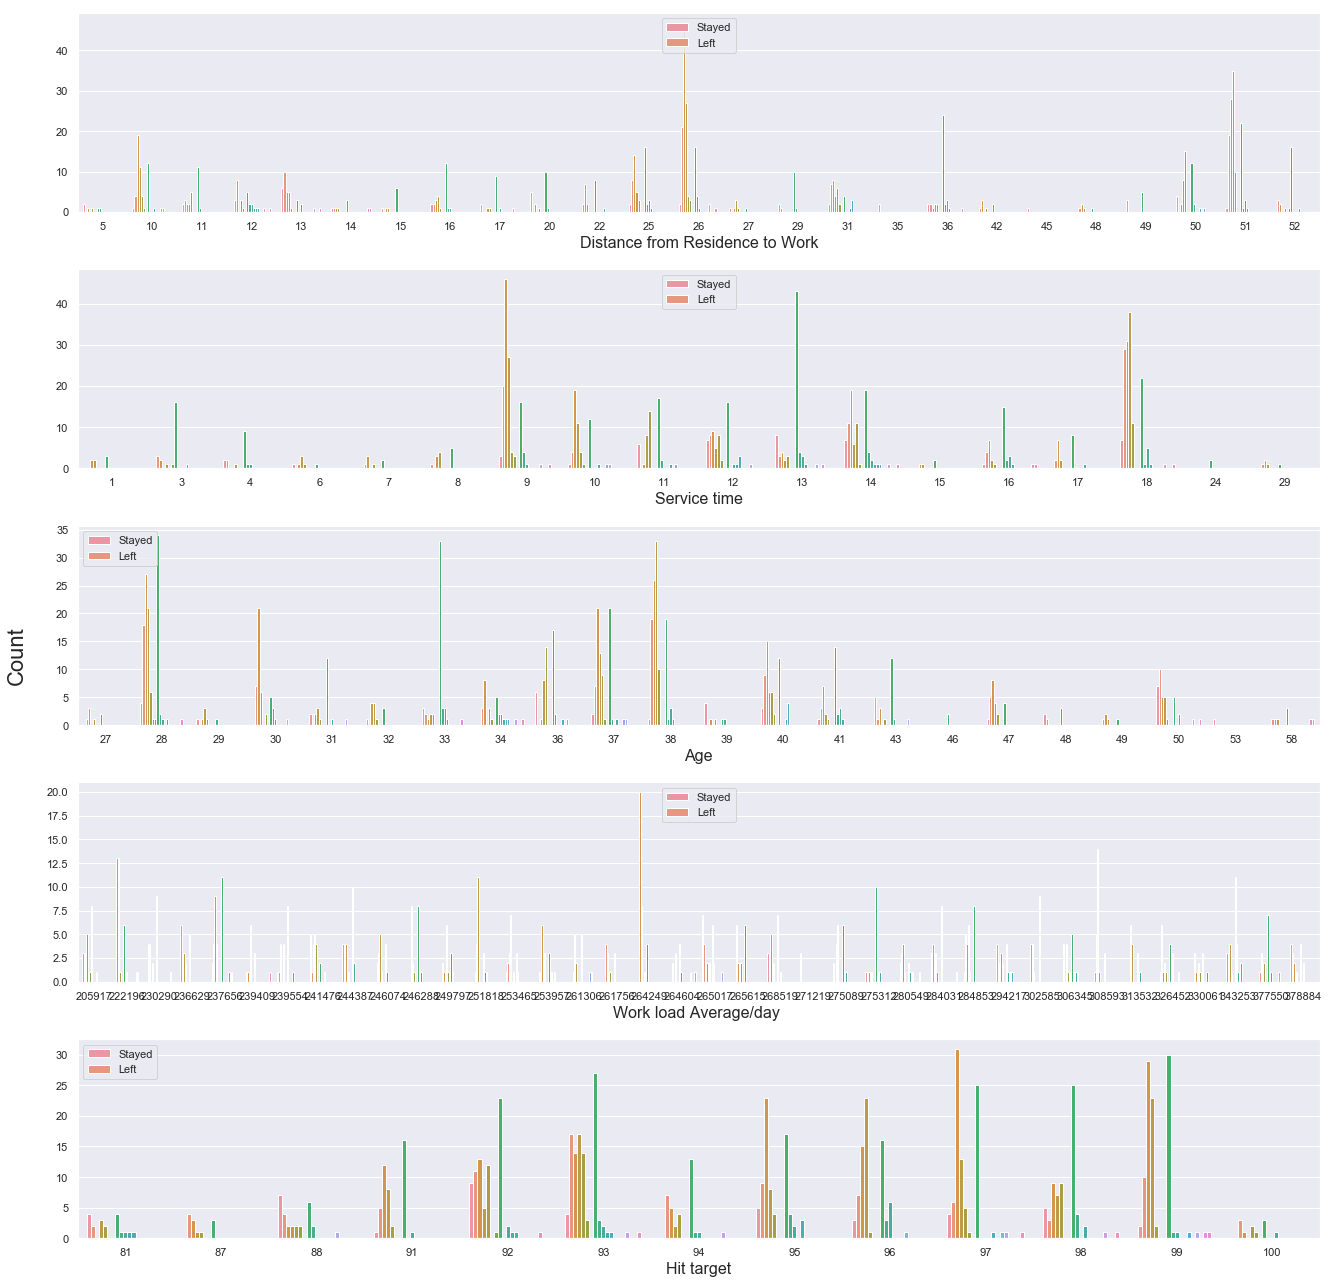

In [86]:
f, axes = plt.subplots(5,1, figsize=(18,18), tight_layout=True)
x_vars = ['Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Absenteeism time in hours', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


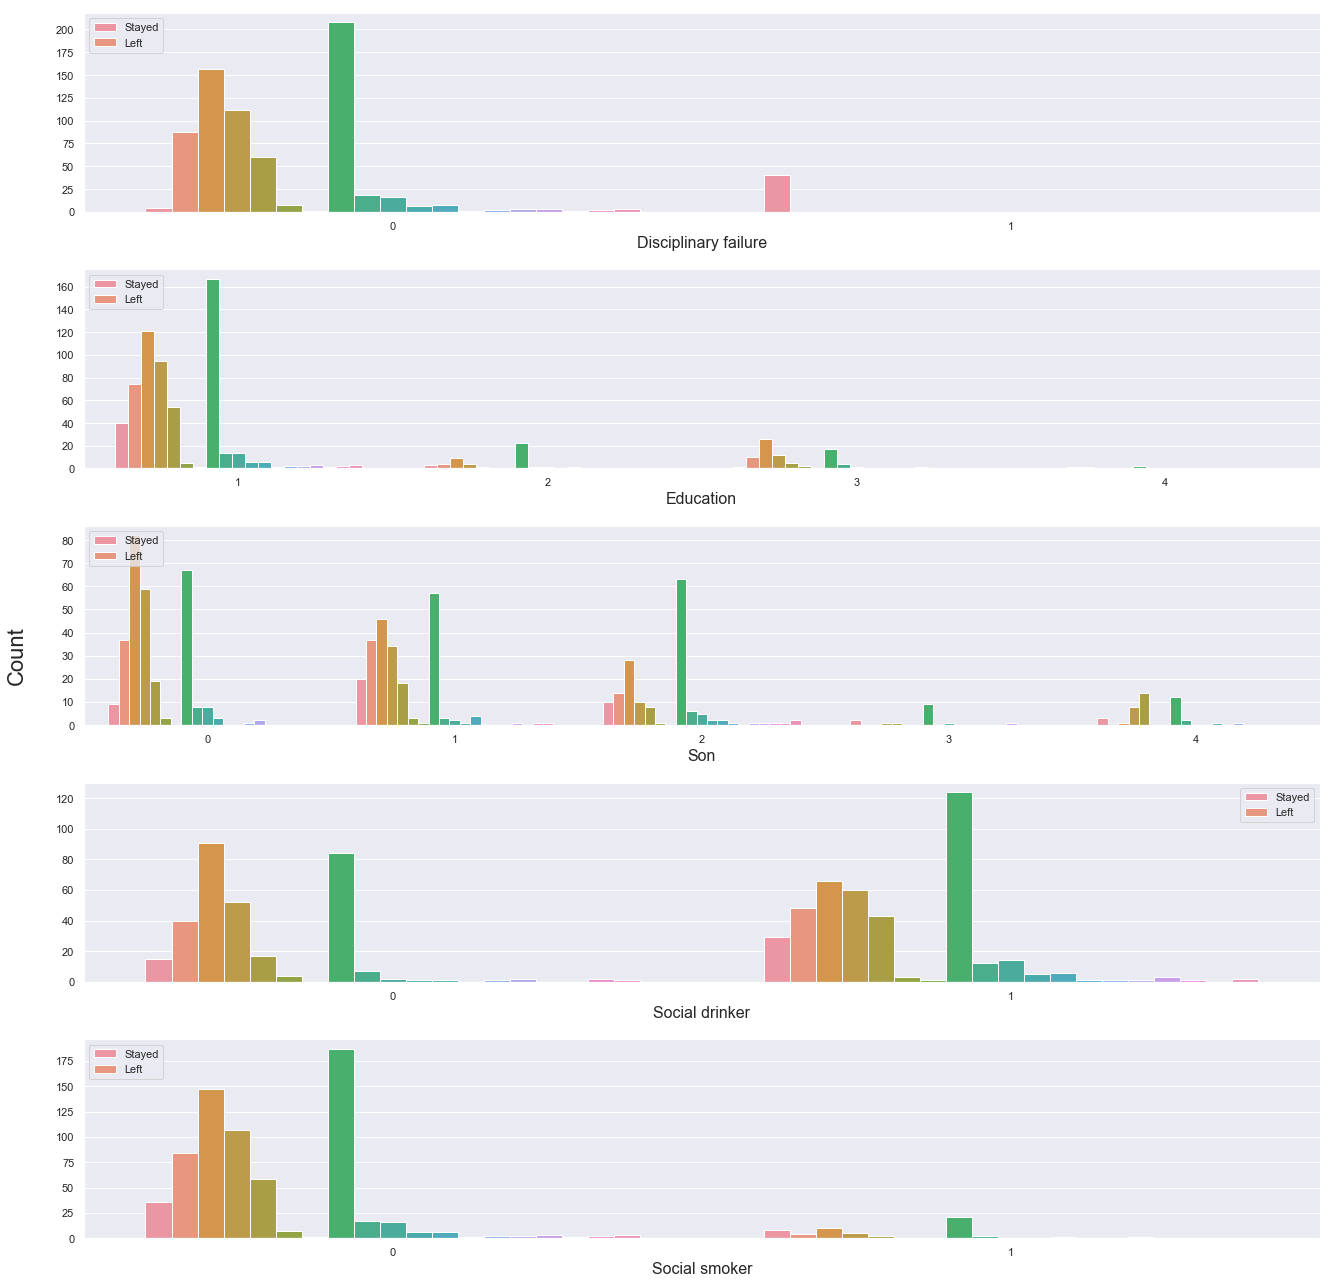

In [85]:
f, axes = plt.subplots(5,1, figsize=(18,18), tight_layout=True)
x_vars = ['Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Absenteeism time in hours', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


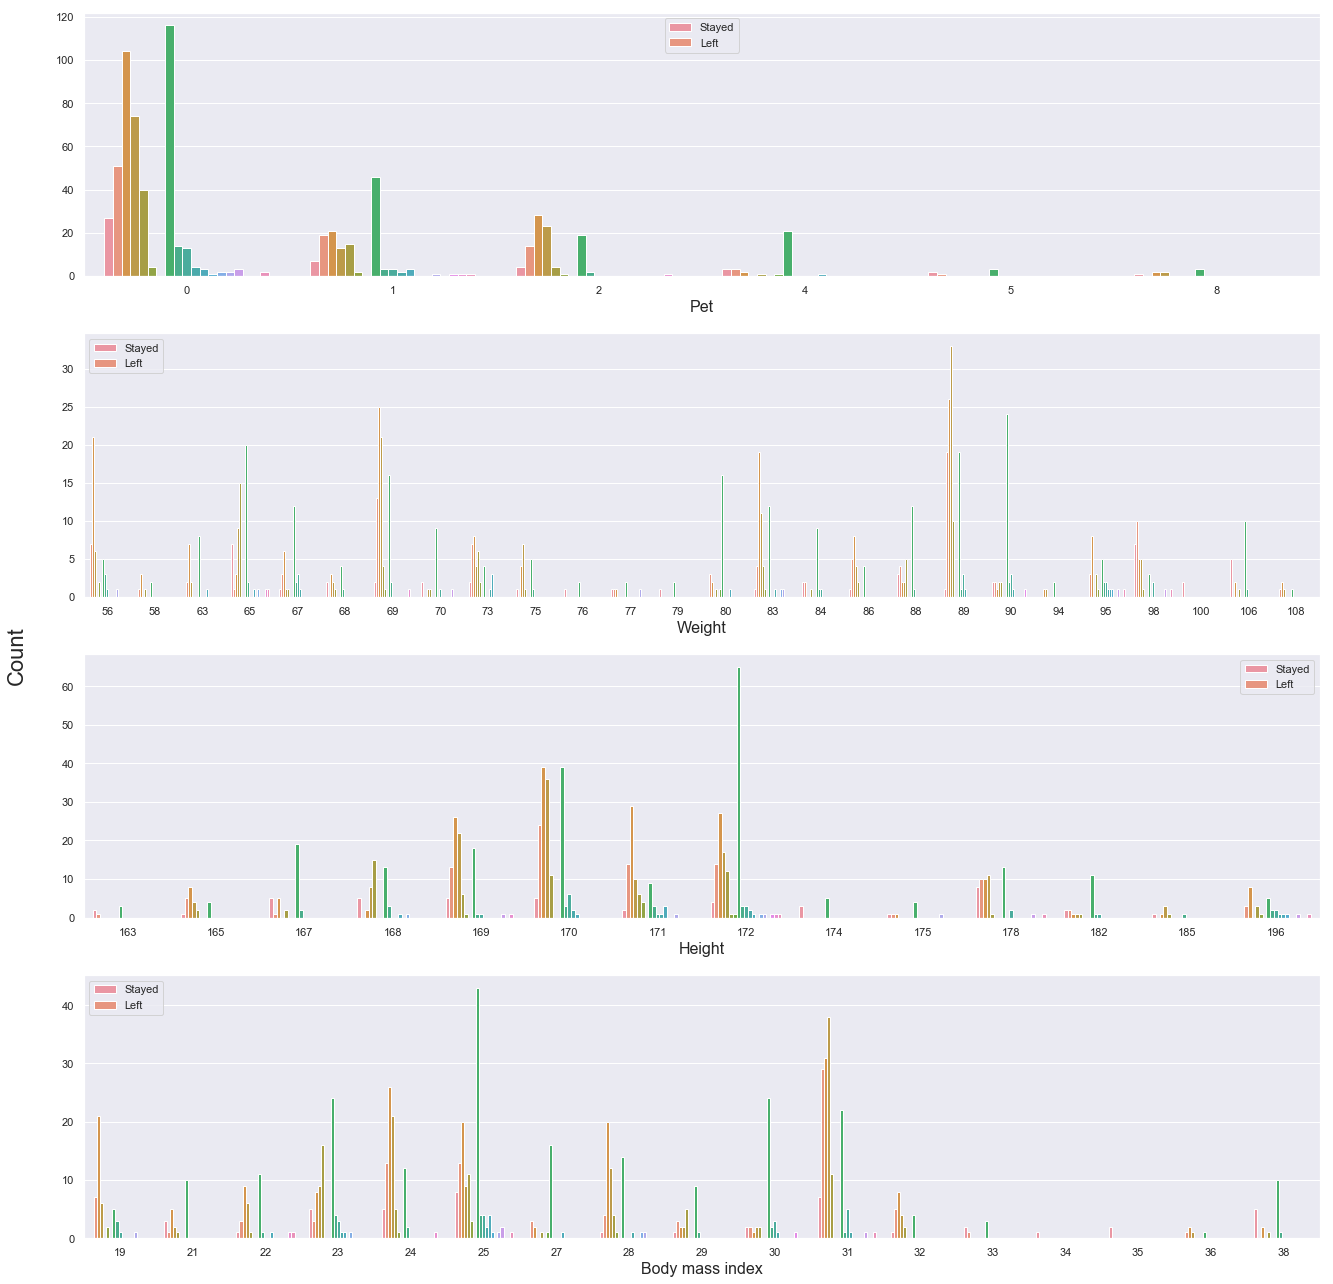

In [84]:
f, axes = plt.subplots(4,1, figsize=(18,18), tight_layout=True)
x_vars = ['Pet', 'Weight', 'Height', 'Body mass index']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='Absenteeism time in hours', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

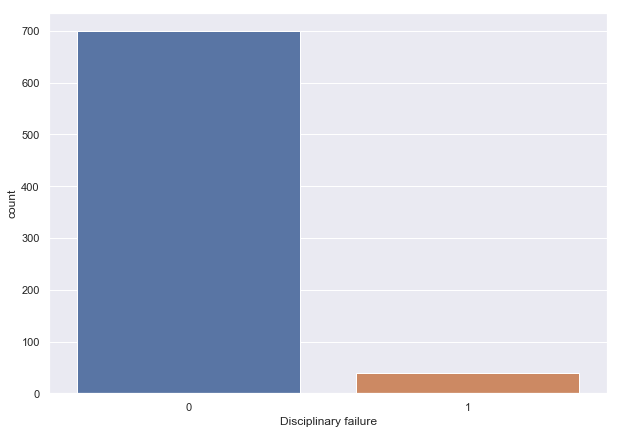

In [14]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Disciplinary failure'])

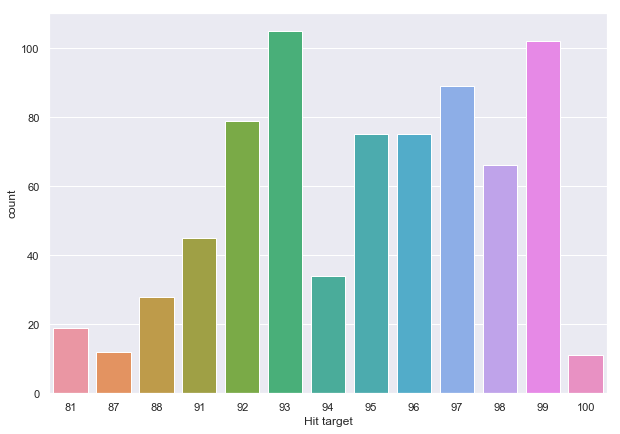

In [15]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Hit target'])

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


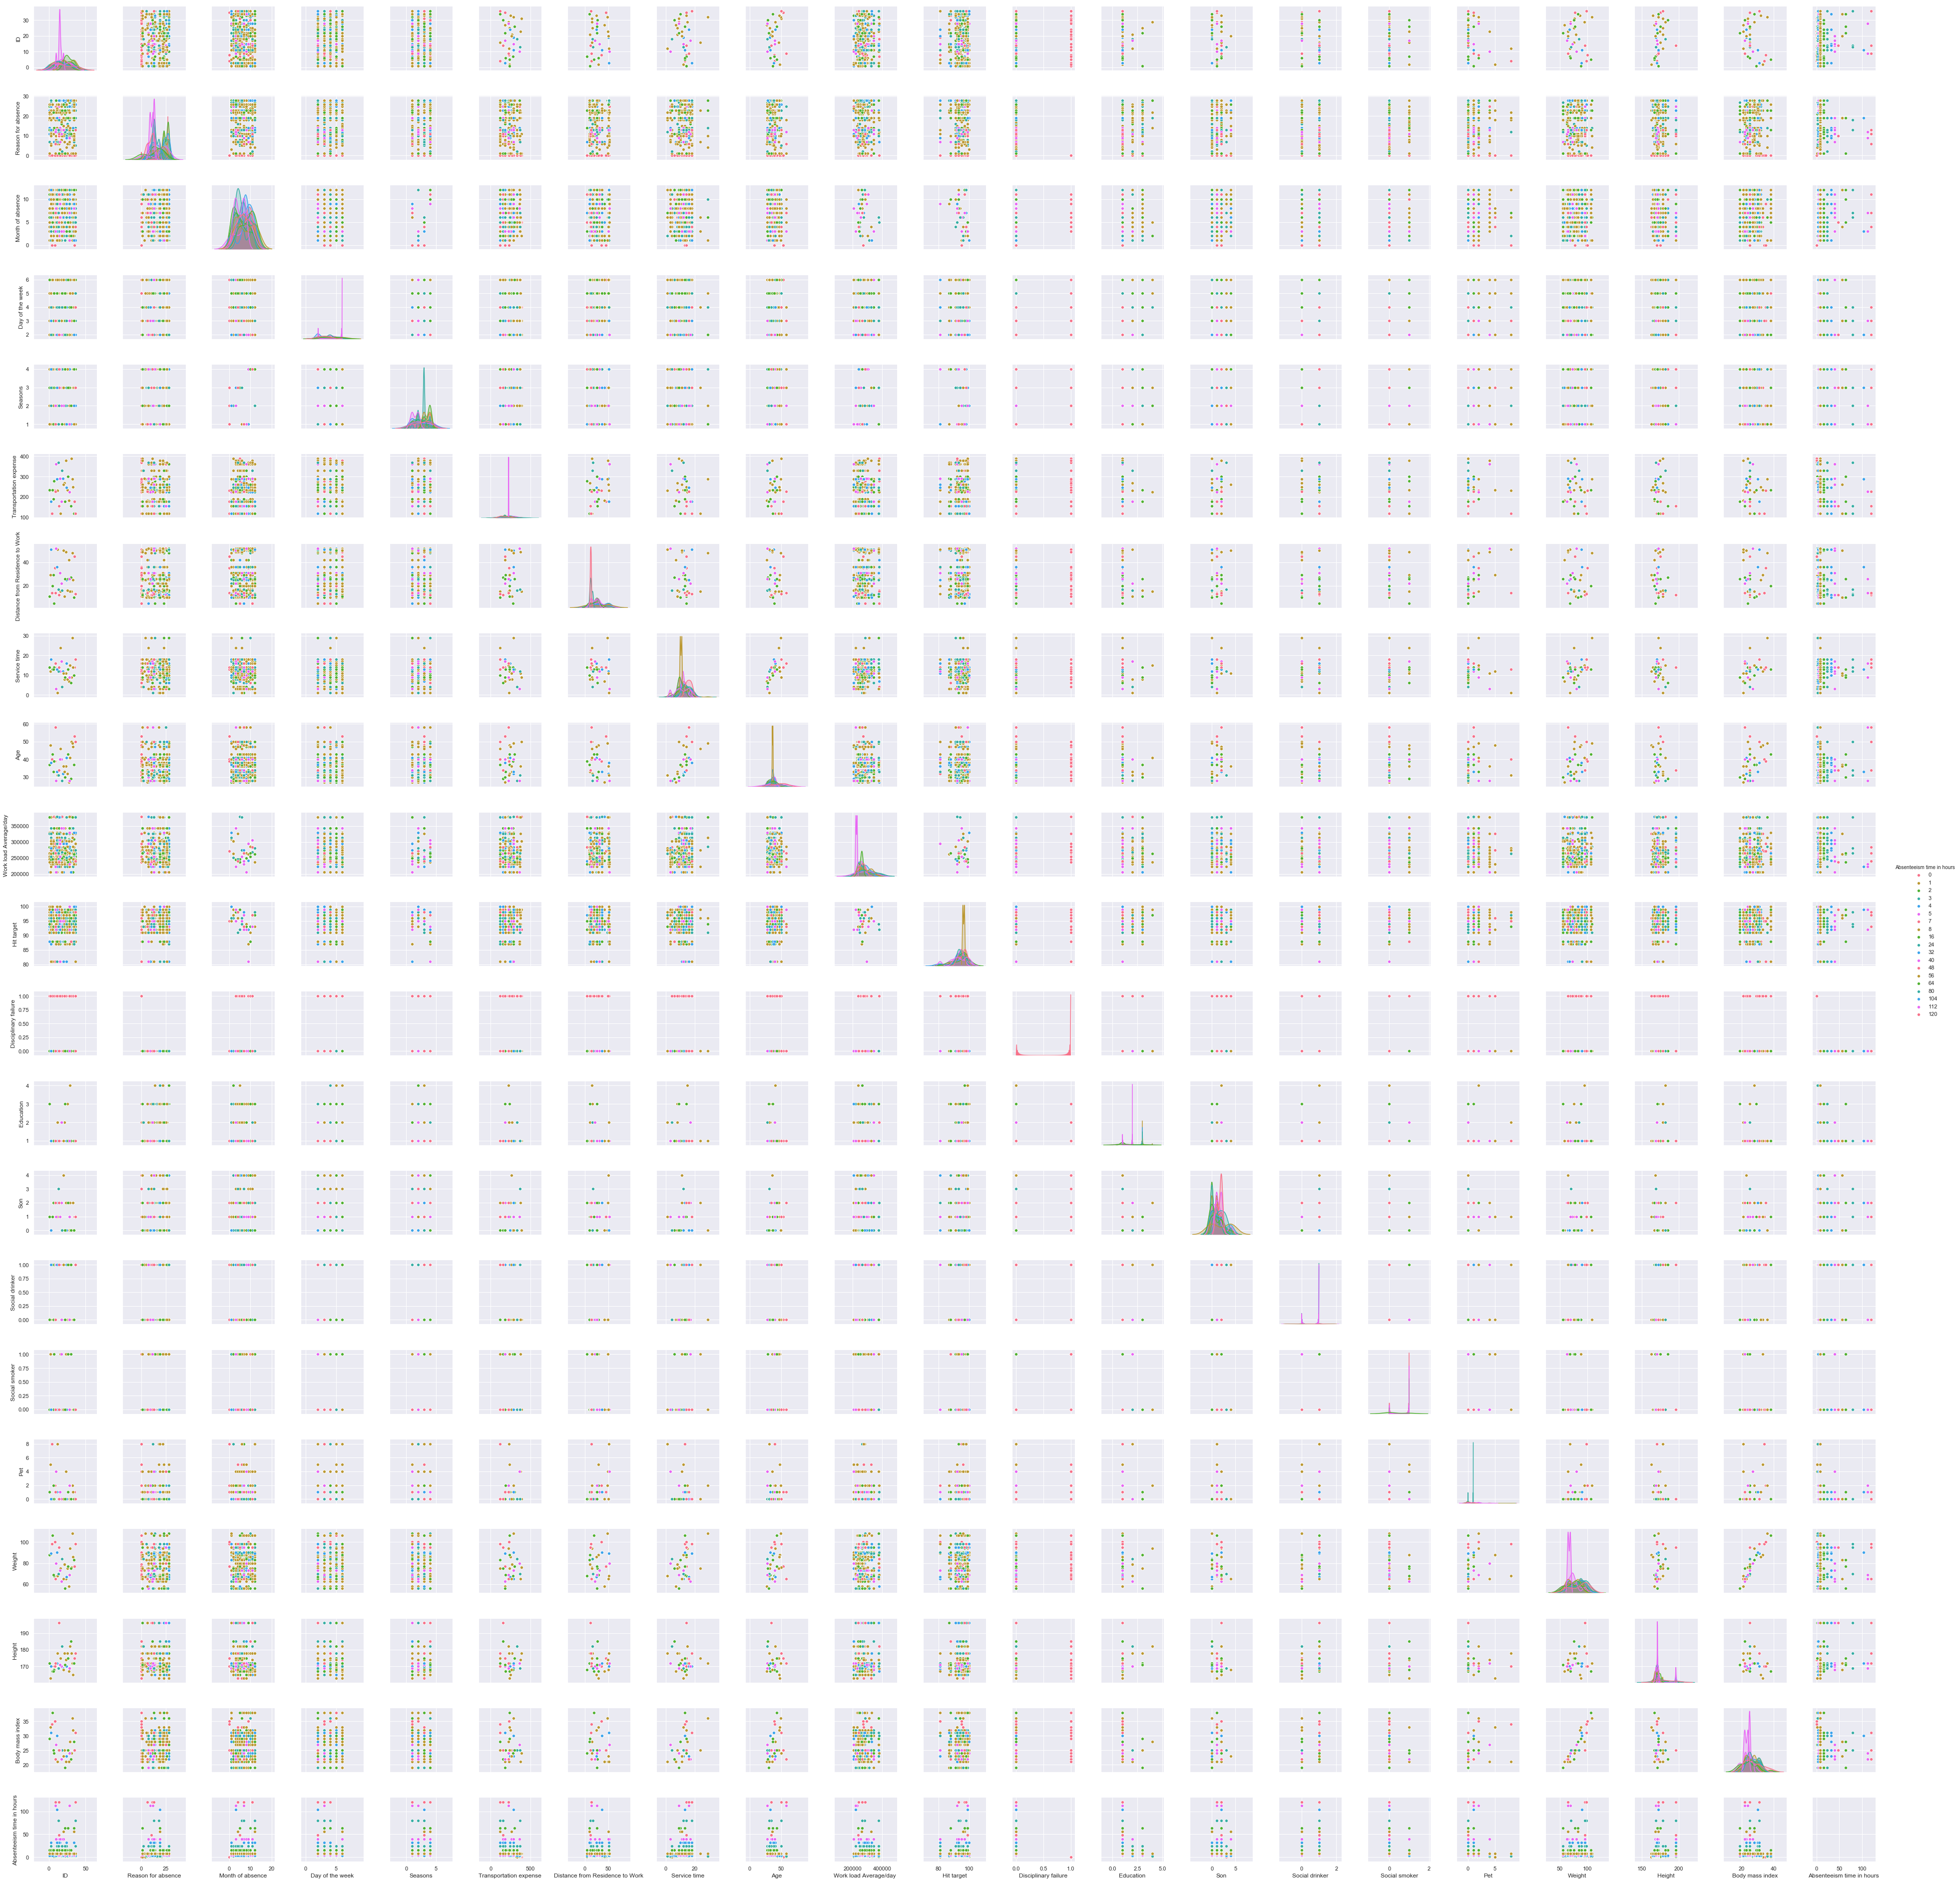

In [48]:
sns.pairplot(df,hue='Absenteeism time in hours',
             palette = sns.color_palette("husl"), size=2.5)

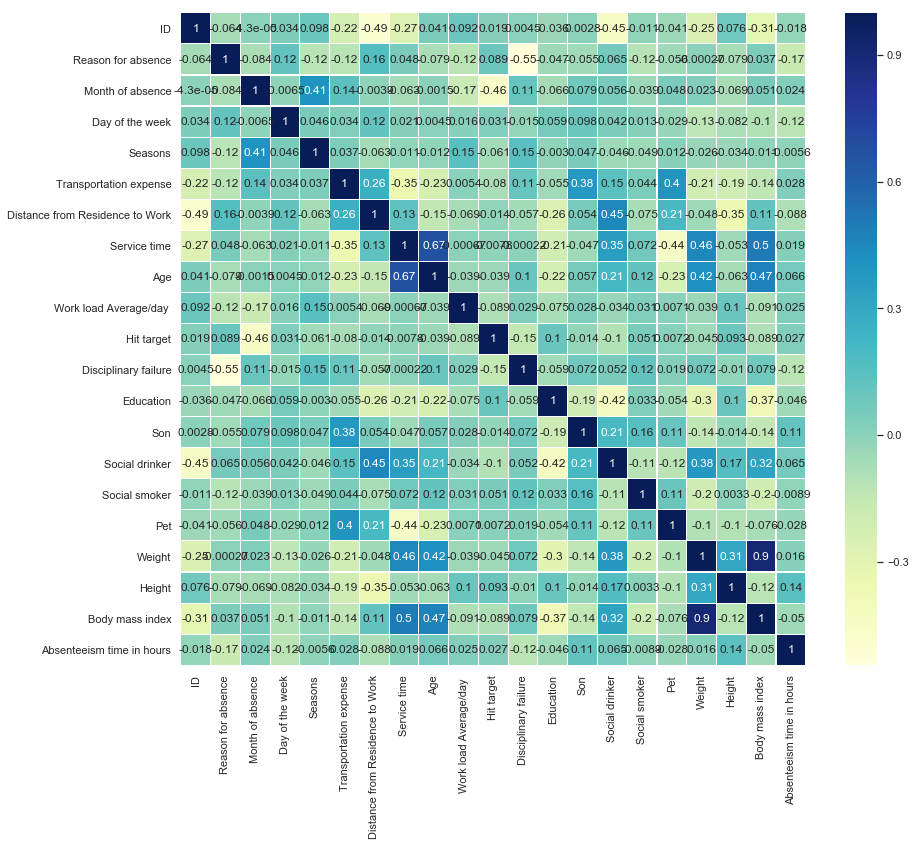

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

<Figure size 1440x2880 with 0 Axes>

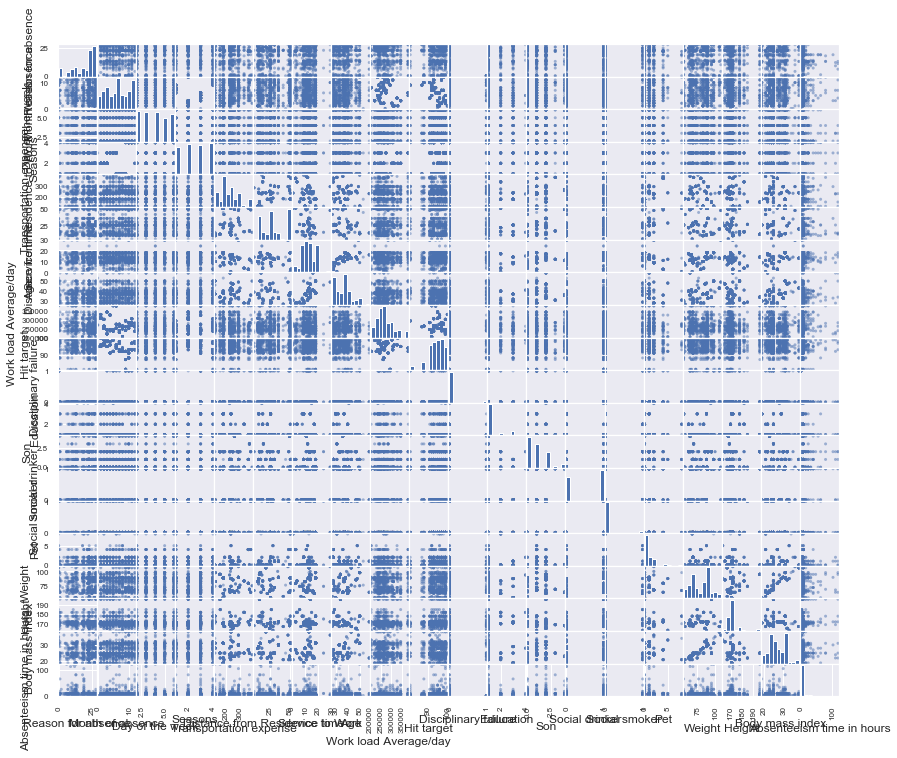

In [165]:
plt.figure(figsize=(20, 40))
scatter_matrix(df)
plt.show()

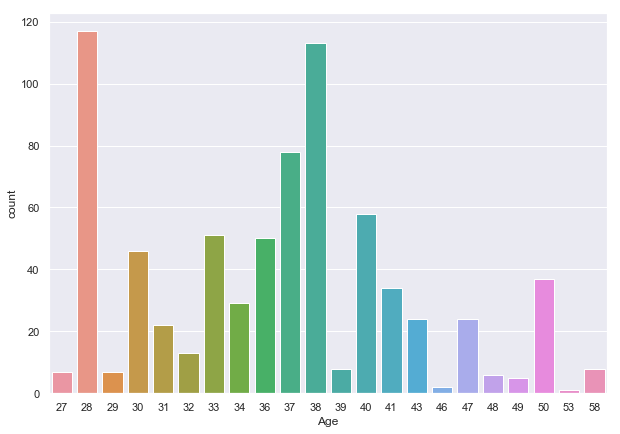

In [28]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Age'])

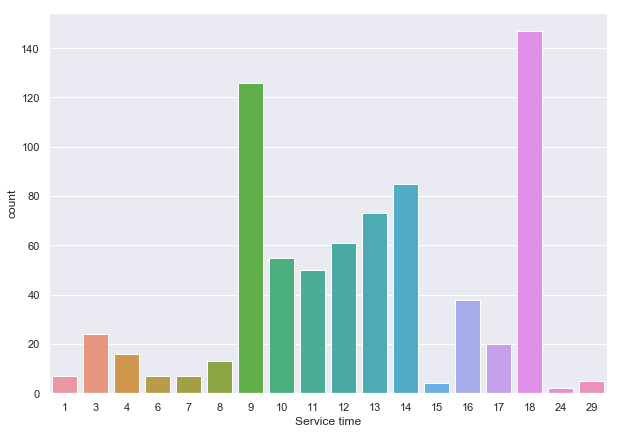

In [34]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Service time'])

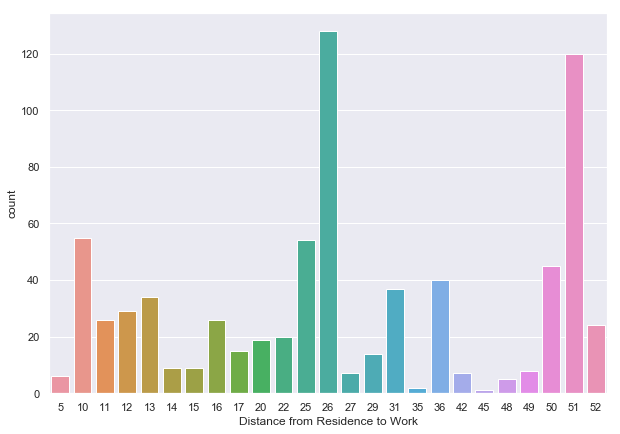

In [33]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Distance from Residence to Work'])

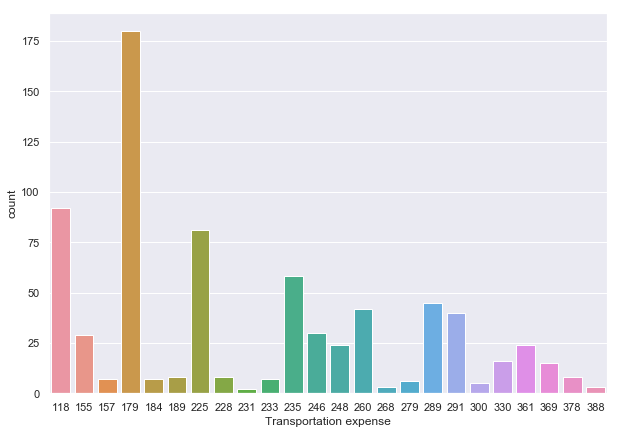

In [32]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Transportation expense'])

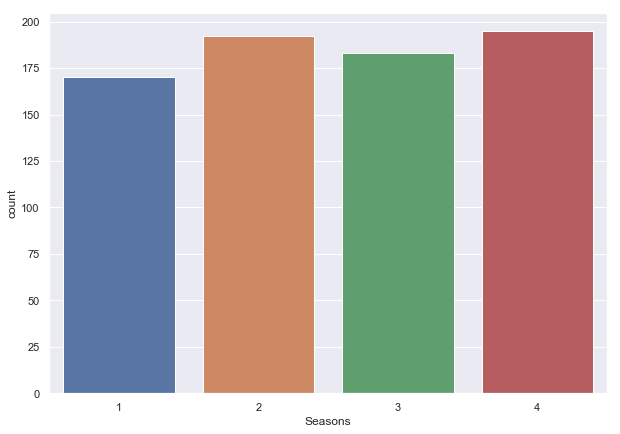

In [31]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Seasons'])

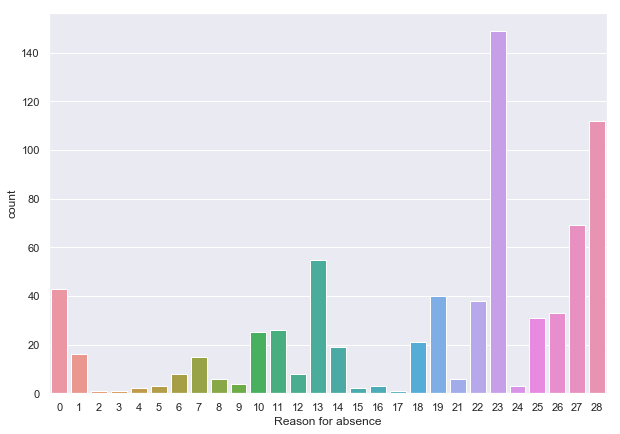

In [30]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Reason for absence'])

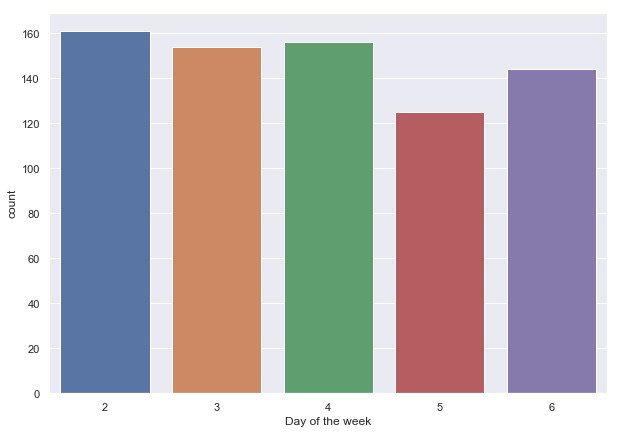

In [17]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Day of the week'])

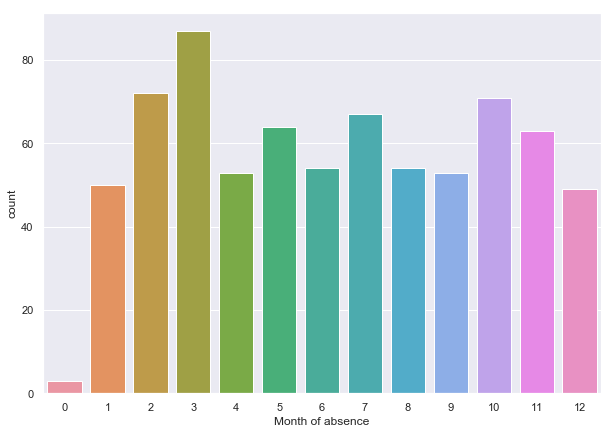

In [18]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Month of absence'])

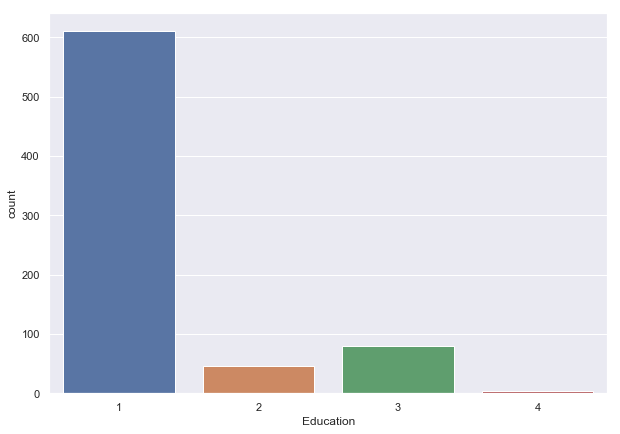

In [19]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Education'])

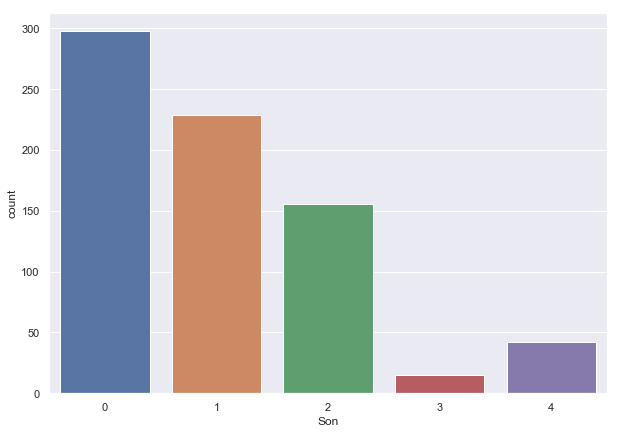

In [20]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Son'])

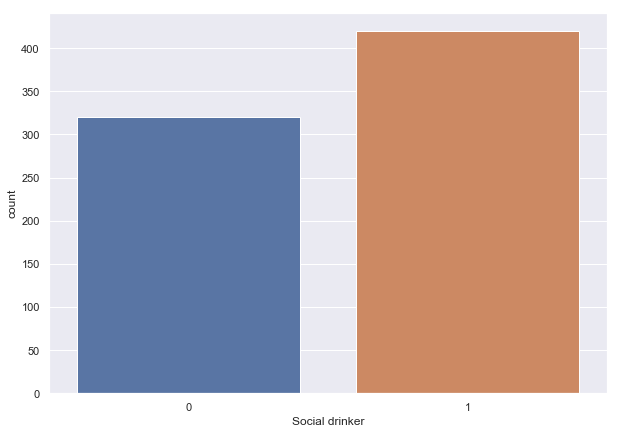

In [21]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Social drinker'])

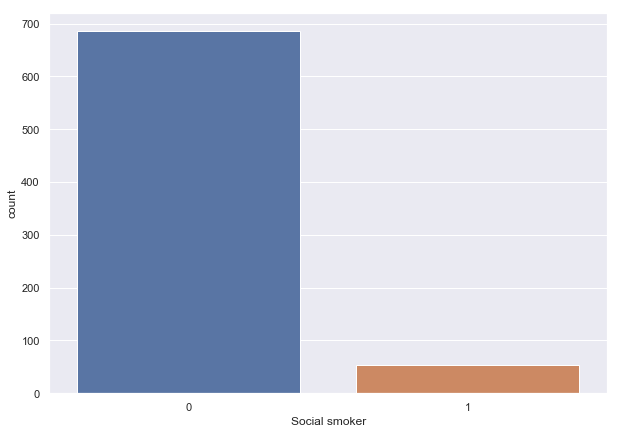

In [22]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Social smoker'])

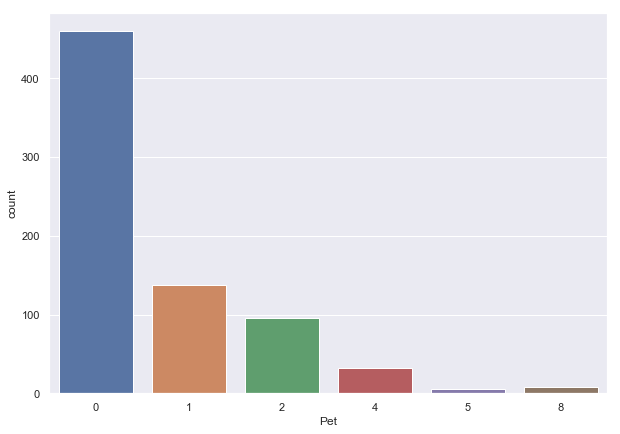

In [23]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Pet'])

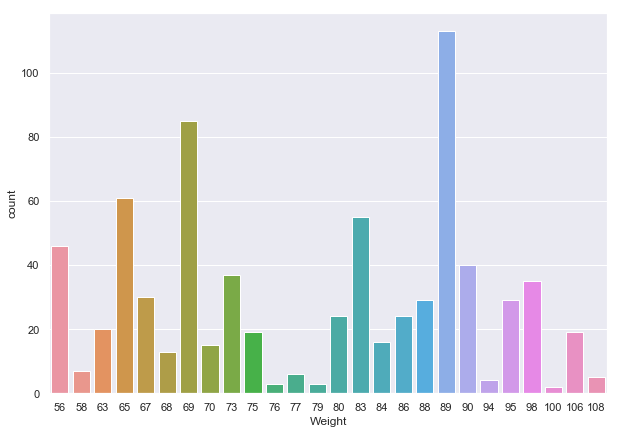

In [24]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Weight'])

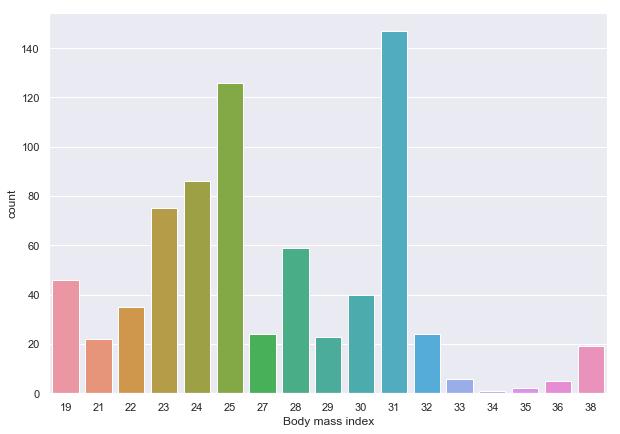

In [25]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Body mass index'])

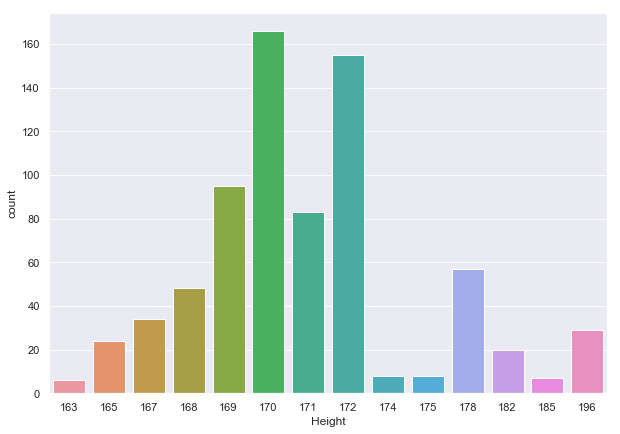

In [11]:
plt.figure(figsize=(10,7))
sns.set()
sns.countplot(df['Height'])

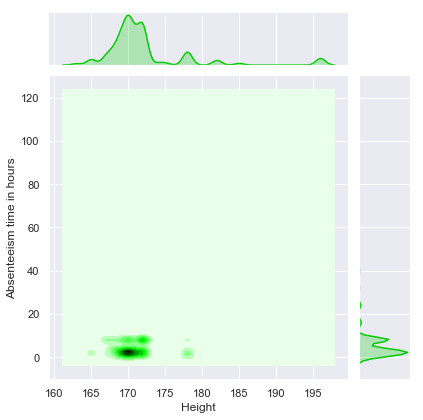

In [52]:
sns.jointplot(df.Height,df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot

In [57]:
df.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


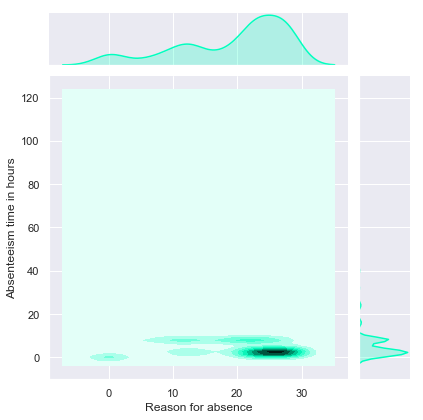

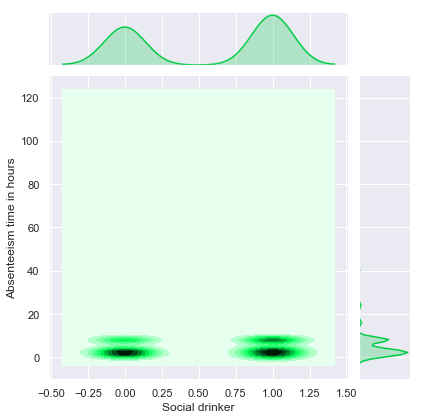

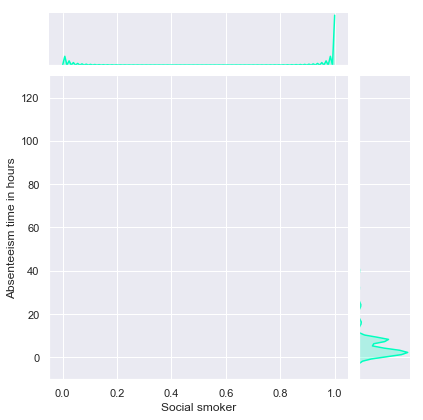

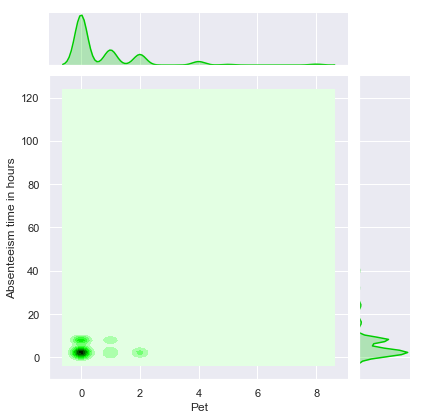

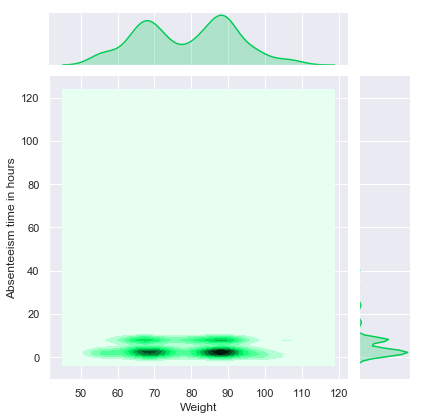

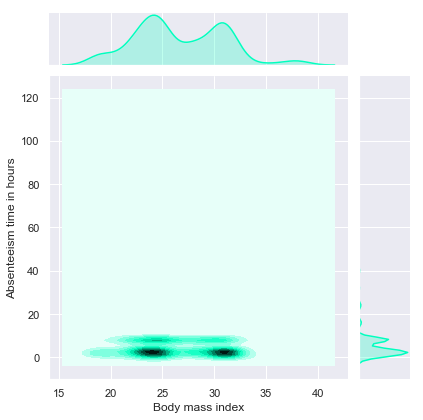

In [64]:
sns.jointplot(df['Reason for absence'],df['Absenteeism time in hours'], color="#00ffbf",kind='kde')
sns.jointplot(df['Social drinker'],df['Absenteeism time in hours'], color="#00cc44",kind='kde')#density plot
sns.jointplot(df['Social smoker'],df['Absenteeism time in hours'], color="#00ffbf",kind='kde')#density plot
sns.jointplot(df.Pet,df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df['Weight'],df['Absenteeism time in hours'], color="#00cc55",kind='kde')#density plot
sns.jointplot(df['Body mass index'],df['Absenteeism time in hours'], color="#00ffbf",kind='kde')#density plotcolor="#00cc00",kind='kde')#density plot

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


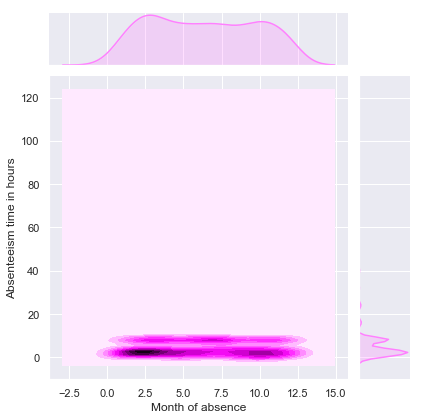

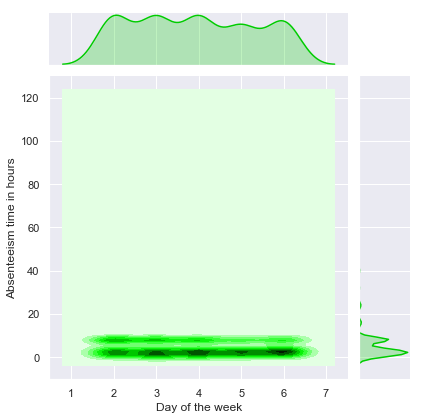

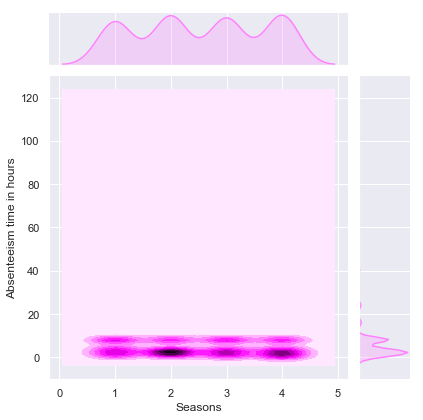

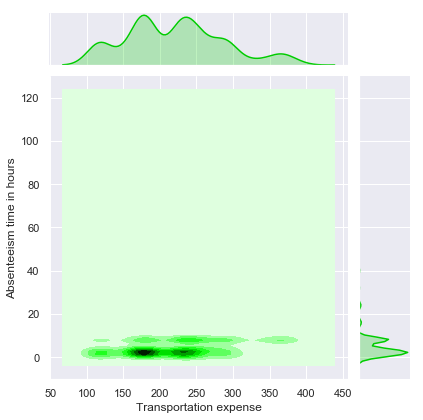

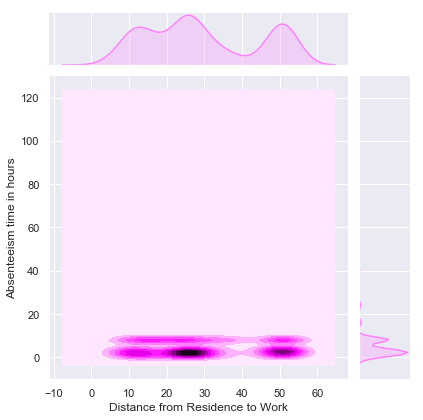

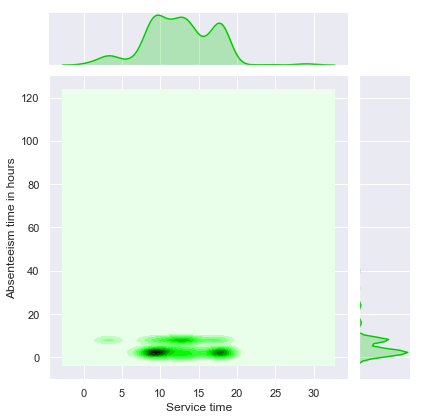

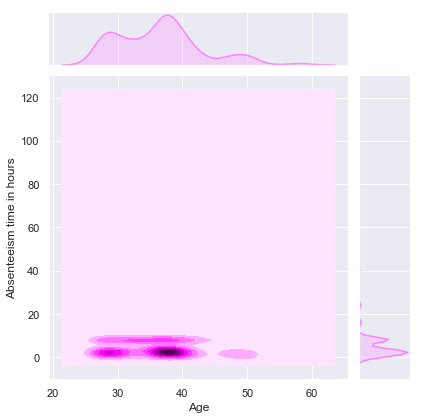

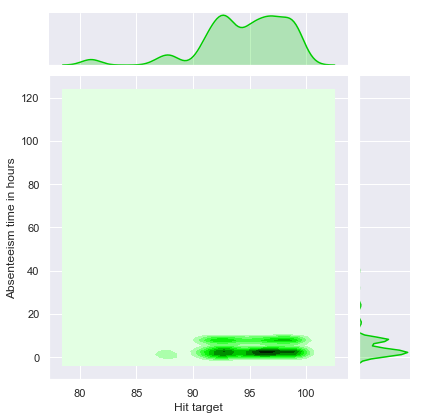

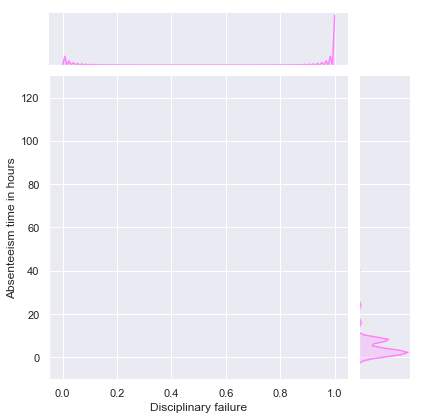

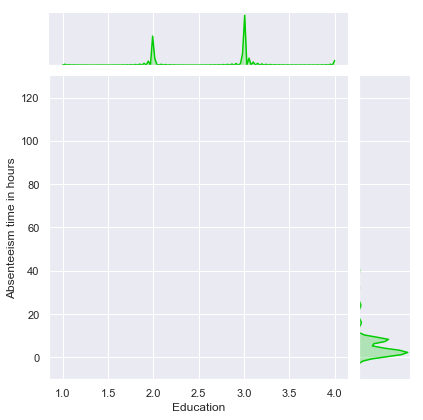

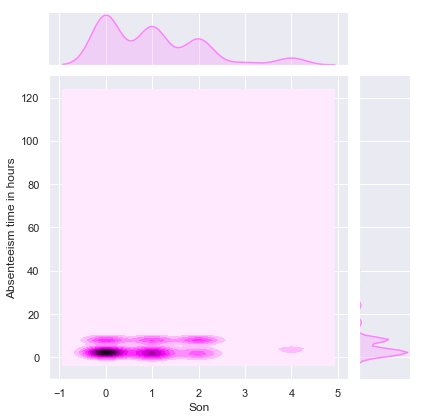

In [63]:
sns.jointplot(df['Month of absence'],df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot
sns.jointplot(df['Day of the week'],df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df.Seasons,df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot
sns.jointplot(df['Transportation expense'],df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot
sns.jointplot(df['Service time'],df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df.Age,df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot
sns.jointplot(df['Hit target'],df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df['Disciplinary failure'],df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot
sns.jointplot(df.Education,df['Absenteeism time in hours'], color="#00cc00",kind='kde')#density plot
sns.jointplot(df.Son,df['Absenteeism time in hours'], color="#ff80ff",kind='kde')#density plot

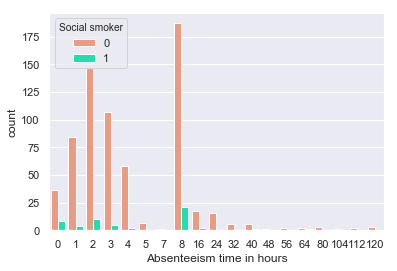

In [65]:
sns.countplot(x = "Absenteeism time in hours", hue = 'Social smoker', data = df, palette=["#fc9272",         "#00ffbf"])

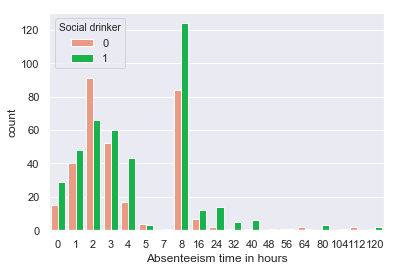

In [68]:
sns.countplot(x = "Absenteeism time in hours", hue = 'Social drinker', data = df, palette=["#fc9272", "#00ffbf"])

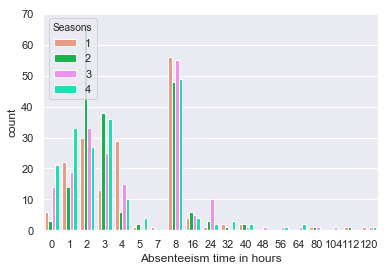

In [69]:
sns.countplot(x = "Absenteeism time in hours", hue = 'Seasons', data = df, palette=["#fc9272", '#00cc44','#ff80ff',"#00ffbf"])

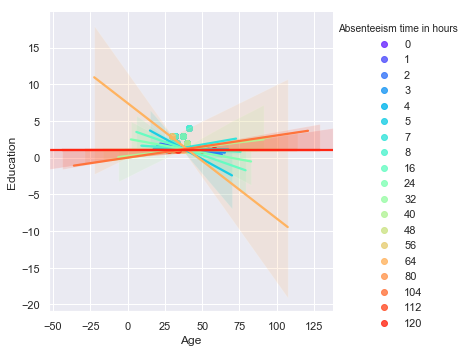

In [106]:
plot = sns.lmplot('Age','Education',data=df,hue='Absenteeism time in hours',palette = "rainbow")
plt.show()

In [139]:
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [140]:
x = df.iloc[:,0:19].values
y = df.iloc[:,19].values

In [141]:
ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0) 

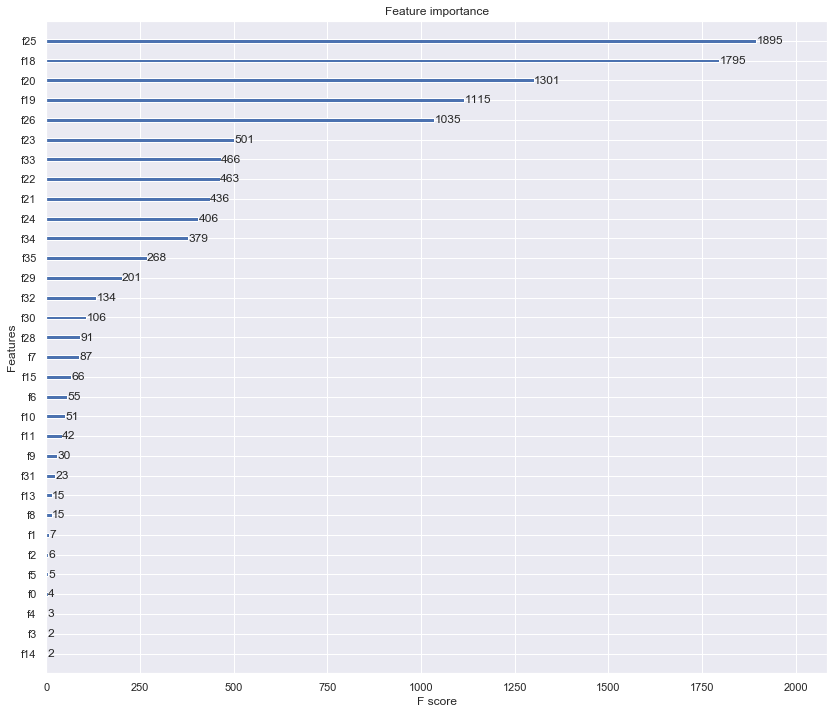

In [143]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, Y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [144]:
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model = boosted_gd.fit(X_train, Y_train)

# Predictions
pred = model.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(Y_test, pred))
print ("The f1 score of model 3 : ", f1_score(Y_test, pred, average = None))

[05:06:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of model 3 :  0.4864864864864865
The f1 score of model 3 :  [1.         0.45       0.56756757 0.2962963  0.24       0.
 0.60655738 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [145]:
print("Confusion Matrix on Test Data")
pd.crosstab(Y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted   0   1   2   3   4  5   8  16  24  40  48  80  112  120  All
True                                                                   
0          12   0   0   0   0  0   0   0   0   0   0   0    0    0   12
1           0   9   3   1   1  0   4   0   1   0   0   0    0    0   19
2           0   3  21   9   4  0   3   1   0   0   0   0    0    0   41
3           0   4   4   8   4  1   4   1   0   0   0   0    0    1   27
4           0   1   2   0   3  0   3   0   0   0   0   0    0    0    9
5           0   0   1   0   0  0   0   0   0   0   0   0    0    0    1
8           0   3   2   8   4  1  37   1   1   0   1   0    1    0   59
16          0   1   0   0   0  0   3   0   0   0   0   0    0    0    4
24          0   0   0   1   0  0   5   0   0   0   0   0    0    0    6
32          0   0   0   0   0  0   2   0   0   1   0   0    0    0    3
40          0   0   0   0   0  0   0   0   0   0   0   1    0    0    1
64          0   0   0   0   0  1   1   0   0   0   0   0    0    0    2
80          0   0   0   0   0  0   1   0   0   0   0   0    0    0    1
All        12  21  33  27  16  3  63   3   2   1   1   1    1    1  185

# Random forest

In [147]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, Y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(Y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(Y_test, pred_2, average = None))

The accuracy of model 2 :  0.5081081081081081
The f1 score of model 2 :  [1.         0.42105263 0.62337662 0.28571429 0.2962963  0.
 0.         0.624      0.         0.         0.         0.
 0.         0.         0.        ]


In [148]:
print("Confusion Matrix on Test Data")
pd.crosstab(Y_test, pred_2, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted   0   1   2   3   4  5  7   8  16  24  40  48  All
True                                                        
0          12   0   0   0   0  0  0   0   0   0   0   0   12
1           0   8   2   2   1  0  1   4   1   0   0   0   19
2           0   4  24   6   4  0  0   3   0   0   0   0   41
3           0   5   3   7   4  1  0   6   1   0   0   0   27
4           0   1   2   0   4  0  0   1   0   0   1   0    9
5           0   0   1   0   0  0  0   0   0   0   0   0    1
8           0   1   4   6   5  0  0  39   1   1   1   1   59
16          0   0   0   0   0  0  0   4   0   0   0   0    4
24          0   0   0   1   0  0  0   5   0   0   0   0    6
32          0   0   0   0   0  0  0   2   0   0   1   0    3
40          0   0   0   0   0  0  0   0   1   0   0   0    1
64          0   0   0   0   0  1  0   1   0   0   0   0    2
80          0   0   0   0   0  0  0   1   0   0   0   0    1
All        12  19  36  22  18  2  1  66   4   1   3   1  185

# Linear regression

In [155]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_scaled = sc_x.fit_transform(X_train)
x_test_scaled = sc_x.transform(X_test)
y_train_scaled = sc_y.fit(Y_train.reshape(-1,1))
y_train_scaled = sc_y.transform(Y_train.reshape(-1,1))
y_test_scaled = sc_y.transform(Y_test.reshape(-1,1))

In [156]:
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train_scaled)
y_pred = sc_y.inverse_transform(linreg.predict(x_test_scaled))

In [157]:
r2_score(Y_test,y_pred)

0.014372548594174694

In [158]:
y_pred = linreg.predict(X_test)
print(linreg.score(x_test_scaled,y_test_scaled))

0.014372548594174361


# decision tree

In [160]:
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)
y_pred = tree.predict(X_test)

In [162]:
importance = tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00008
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00033
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.07137
Feature: 7, Score: 0.00004
Feature: 8, Score: 0.00292
Feature: 9, Score: 0.02747
Feature: 10, Score: 0.00190
Feature: 11, Score: 0.00004
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00056
Feature: 14, Score: 0.00070
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.21210
Feature: 19, Score: 0.01058
Feature: 20, Score: 0.10420
Feature: 21, Score: 0.13226
Feature: 22, Score: 0.00023
Feature: 23, Score: 0.00102
Feature: 24, Score: 0.10408
Feature: 25, Score: 0.18350
Feature: 26, Score: 0.07379
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00102
Feature: 29, Score: 0.01196
Feature: 30, Score: 0.00317
Feature: 31, Score: 0.00036
Feature: 32, Score: 0.00404
Feature: 33, Score: 0.00185
Feature: 34, Score: 0.04883
Feature: 35, Score: 0.00161


In [163]:
r2_score(Y_test,y_pred)

-2.2115078289832812

In [166]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [167]:
#(df=df.drop(['Seasons','Day of the week','Month of absence','Pet', 'Weight', 'Height', 'Body mass index'],axis=1))

In [168]:
#(x = df.iloc[:,0:-1].values
#y = df.iloc[:,-1].values)

[05:28:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of model 3 :  0.4648648648648649
The f1 score of model 3 :  [1.         0.37209302 0.54794521 0.32142857 0.25       0.
 0.5862069  0.         0.         0.         0.         0.
 0.         0.         0.        ]


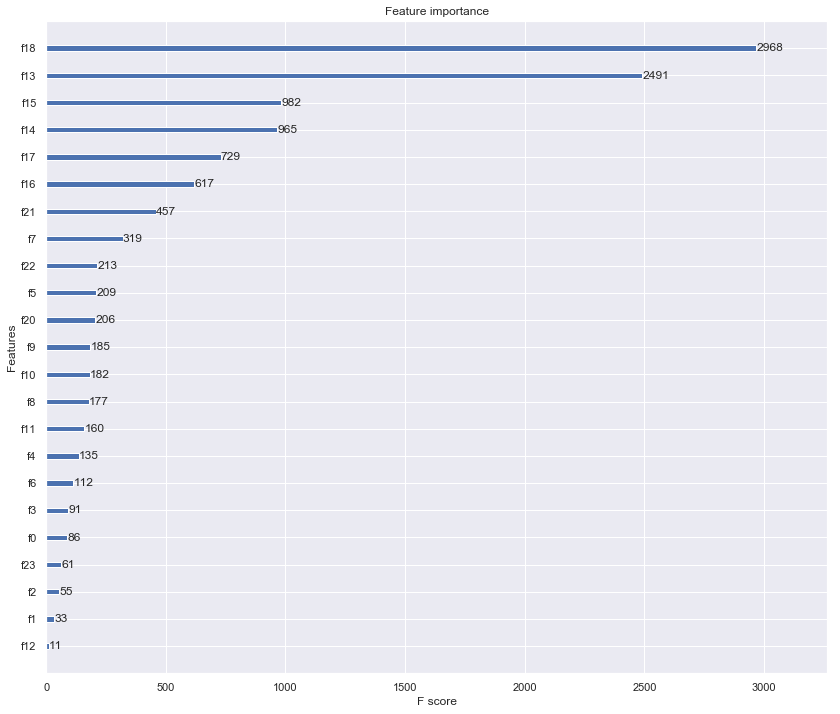

In [169]:
(ct = ColumnTransformer([("encoder",OneHotEncoder(categories = "auto"),[6])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 0) 
# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, Y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 200)
model = boosted_gd.fit(X_train, Y_train)

# Predictions
pred = model.predict(X_test)

print ("The accuracy of model 3 : ",accuracy_score(Y_test, pred))
print ("The f1 score of model 3 : ", f1_score(Y_test, pred, average = None)))